In [ ]:
# Author: Vanshika Gupta
# Jointly with: Prof Chrysafis Vogiatzis 

#### Importing networkx and other necessary packages (like ``random``)

In [44]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from itertools import combinations

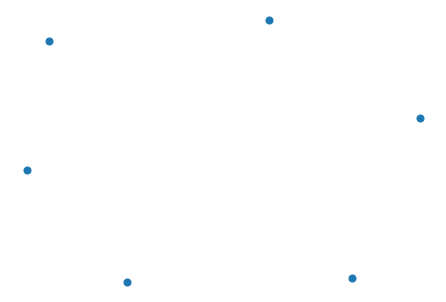

In [45]:
num_nodes=6
G=nx.DiGraph()
G.add_nodes_from([(1, dict(demand=-1)), (2, dict(demand=-3)), (3, dict(demand=0)), (4, dict(demand=0)), (5, dict(demand=2)), (6, dict(demand=2))])

pos=nx.spring_layout(G)
nx.draw(G,pos, with_labels=False, node_size=50, width=0.5) 

In [46]:
G.add_weighted_edges_from([(1,2,2),(1,3,3),(1,4,3),(2,3,2),(3,4,2),(4,6,1),(5,6,3),(2,5,4),(3,5,1)])
print("Node: \n", G.nodes(data=True)) 
print("Edges: \n", G.edges(data=True))

Node: 
 [(1, {'demand': -1}), (2, {'demand': -3}), (3, {'demand': 0}), (4, {'demand': 0}), (5, {'demand': 2}), (6, {'demand': 2})]
Edges: 
 [(1, 2, {'weight': 2}), (1, 3, {'weight': 3}), (1, 4, {'weight': 3}), (2, 3, {'weight': 2}), (2, 5, {'weight': 4}), (3, 4, {'weight': 2}), (3, 5, {'weight': 1}), (4, 6, {'weight': 1}), (5, 6, {'weight': 3})]


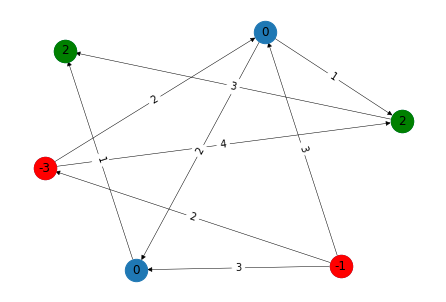

In [64]:
labels = nx.get_node_attributes(G, 'demand') 
edge_labels = nx.get_edge_attributes(G,'weight')
nx.draw(G,pos, node_size=500, width=0.5, labels=labels)
# nx.draw(G,pos, node_size=500, width=0.5, with_labels=True)
nx.draw_networkx_edge_labels(G,pos, edge_labels=edge_labels)
nx.draw_networkx_nodes(G,pos, nodelist=[i for (i,d) in G.nodes(data=True) if d['demand']<0], node_color='r', node_size=500) 
nx.draw_networkx_nodes(G,pos, nodelist=[i for (i,d) in G.nodes(data=True) if d['demand']>0], node_color='g', node_size=500) 

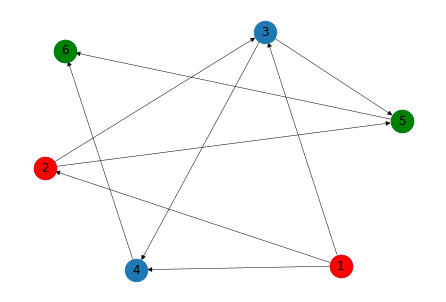

In [63]:
labels = nx.get_node_attributes(G, 'demand') 
nx.draw(G,pos, node_size=500, width=0.5, with_labels=True)
nx.draw_networkx_nodes(G,pos, nodelist=[i for (i,d) in G.nodes(data=True) if d['demand']<0], node_color='r', node_size=500) 
nx.draw_networkx_nodes(G,pos, nodelist=[i for (i,d) in G.nodes(data=True) if d['demand']>0], node_color='g', node_size=500) 

In [65]:
flowCost, flowDict = nx.network_simplex(G, weight='weight', demand='demand')
print("The cost is", flowCost)
print("The flows are (in dictionary form):", flowDict)

The cost is 15
The flows are (in dictionary form): {1: {2: 0, 3: 0, 4: 1}, 2: {3: 3, 5: 0}, 3: {4: 1, 5: 2}, 4: {6: 2}, 5: {6: 0}, 6: {}}
